In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing

from assistments_workbench.models.model import classification_model
from assistments_workbench.config_reader import config

In [3]:
pylab.rcParams['figure.figsize'] = 9, 6
pylab.rcParams['font.size'] = 14

In [4]:
k = 5

In [5]:
input_data = pd.read_csv(os.path.join(config.get('localfiles', 'data_path'), 'sql_data_2_pfa.csv'))

In [6]:
input_data.describe()

,correct,seq_id,diff,pre_correct,pre_incorrect
count,708630.000000,708630.000000,708630.000000,708630.000000,708630.000000
mean,0.741160,22683.498414,0.323628,2.566146,1.942478
std,0.437998,41593.052624,0.142968,3.559439,3.811801
min,0.000000,5898.000000,0.000000,0.000000,0.000000
25%,0.000000,7020.000000,0.216667,0.000000,0.000000
50%,1.000000,9424.000000,0.310096,2.000000,1.000000
75%,1.000000,14442.000000,0.416244,3.000000,2.000000
max,1.000000,236309.000000,0.956633,57.000000,109.000000


In [7]:
input_data.head()

,correct,seq_id,diff,pre_correct,pre_incorrect
0,0,7014,0.355283,0,0
1,1,7014,0.307557,0,1
2,1,7014,0.166937,1,1
3,1,7014,0.300319,2,1
4,1,7014,0.303150,0,0


In [8]:
# mean of probelm difficulty
np.mean(input_data['diff'])

0.32362751684203134

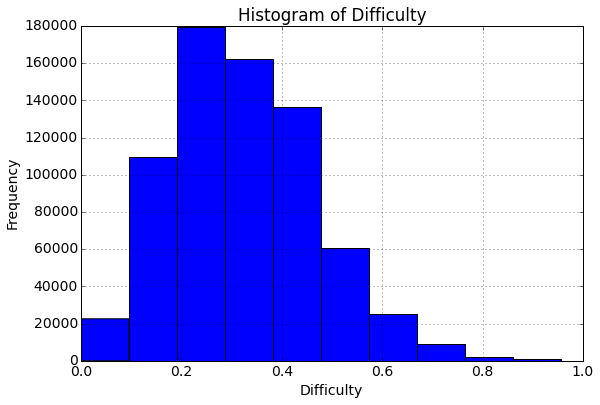

In [9]:
# hisogtam of difficulty
input_data['diff'].hist()
plt.title('Histogram of Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')

In [10]:
# input_data['opp_count'] = input_data['pre_corr'] + input_data['pre_incorr']

In [11]:
# pd.crosstab(input_data['opp_count'][:100], input_data['correct'][:100].astype(bool)).plot(kind='bar')
# plt.title('Num of pervious opportunities by by correctness')
# plt.xlabel('Num of pervious opportunity ')
# plt.ylabel('Frequency')

In [12]:
all_features = input_data.columns.tolist()
print all_features

['correct', 'seq_id', 'diff', 'pre_correct', 'pre_incorrect']


In [13]:
label = 'correct'
all_features.remove(label)
predictors = all_features
categorical_features = ['seq_id']

In [14]:
model = LogisticRegression()
classification_model(model, input_data, predictors, label, categorical_features, k)

Predictors: ['seq_id', 'diff', 'pre_correct', 'pre_incorrect']


auc: 0.726457898896
r2: 0.124908284221
rmse: 0.409736606296
accuracy: 0.755653867321
